In [2]:
# Numpy and Pandas 
import numpy as np
import pandas as pd

# Vizualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Machine learning algorithms
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

# Machine learning pipeline 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Regression Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Ignore ConvergenceWarning messages
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# Check the fitted_model
from sklearn.exceptions import NotFittedError

# Save python object to disk
import pickle

from keras import backend as K

from sklearn import preprocessing

import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from sklearn.metrics import confusion_matrix , classification_report
import tensorflow.python.keras
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.models import model_from_json
from tensorflow.python.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras import backend as K
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [3]:
df = pd.read_csv(r"D:\Ram\MTech\Final_Year_Paper_Work\14226830\VAH22.csv")

In [4]:
df

,time_s,Ecell_V,I_mA,EnergyCharge_W_h,QCharge_mA_h,EnergyDischarge_W_h,QDischarge_mA_h,Temperature__C,cycleNumber,Ns,TimeDelta,soc
0,0.000000e+00,3.539573,1491.4921,0.000000,0.000000,0.000000,0.00000,24.575109,0,0,0.000000,0.000000
1,3.000000e+01,3.547016,1489.7195,0.044033,12.414182,0.000000,0.00000,24.677822,0,0,30.000001,0.006207
2,6.000000e+01,3.551938,1489.9165,0.088127,24.828216,0.000000,0.00000,25.136082,0,0,30.000001,0.012415
3,9.000000e+01,3.556428,1488.1439,0.132276,37.242144,0.000000,0.00000,25.246696,0,0,30.000001,0.018616
4,1.200000e+02,3.560917,1489.3257,0.176481,49.656028,0.000000,0.00000,25.057074,0,0,30.000001,0.024821
...,...,...,...,...,...,...,...,...,...,...,...,...
385424,4.399571e+06,3.549772,0.0000,8.439746,0.000000,-6.548237,1900.65198,20.798407,41,8,30.000003,0.007260
385425,4.399601e+06,3.549733,0.0000,8.439746,0.000000,-6.548237,1900.65198,20.932724,41,8,30.000003,0.007260
385426,4.399631e+06,3.549812,0.0000,8.439746,0.000000,-6.548237,1900.65198,21.019634,41,8,30.000003,0.007260
385427,4.399661e+06,3.549772,0.0000,8.439746,0.000000,-6.548237,1900.65198,20.727297,41,8,30.000003,0.007260


In [5]:
df.shape

(385429, 12)

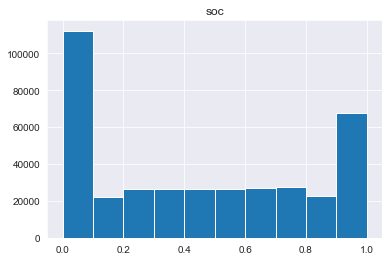

In [6]:
df.hist(column='soc')
plt.show()

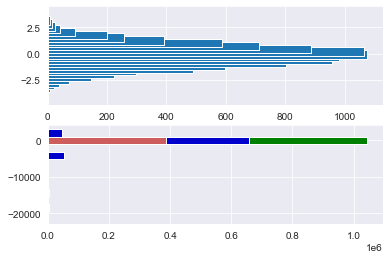

In [7]:
df1=df["Ecell_V"]
df2=df["I_mA"]
df3=df["soc"]
df4=df["Temperature__C"]

colors1 = ['indianred', 'mediumblue','green','black']
names = ['Voltage','SoC', 'Current', 'Temperature']

colors = ['indianred', 'mediumblue','green']
plt.hist([df1, df2, df3, df4], bins = int(180/15), stacked=True,
         color = colors1, label=names, orientation='horizontal')
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Voltage (V), Current (A), SoC(%), Temperature')
plt.title('Voltage, Current, SoC')
sample=np.random.normal(size=10000)
vert_hist=np.histogram(sample,bins=30)
ax1=plt.subplot(2,1,1)
ax1.barh(vert_hist[1][:-1],vert_hist[0])
ax2=plt.subplot(2,1,2)
ax2.hist([df1, df2, df3], bins = int(180/15), stacked=True,
         color = colors, label=names,orientation='horizontal')
plt.show()

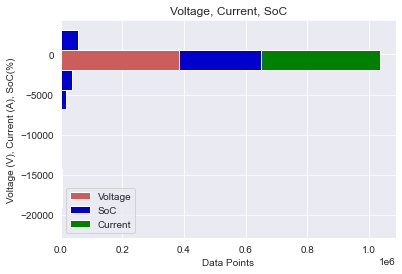

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Voltage, Current, SoC')

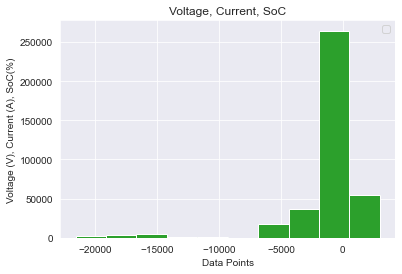

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig=plt.hist([df1, df2,df3], stacked=True,
         color = colors,label=names,orientation='horizontal')
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Voltage (V), Current (A), SoC(%)')
plt.title('Voltage, Current, SoC',loc='center')


# ax.hist([df1, df2,df3], bins, orientation='horizontal')
plt.show()
plt.savefig('Data.jpeg', dpi=600)

plt.hist(df1)
plt.hist(df3)
plt.hist(df2)
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Voltage (V), Current (A), SoC(%)')
plt.title('Voltage, Current, SoC',loc='center')

In [9]:
y = df['soc']
X = df.drop(['Ns','cycleNumber','time_s','EnergyCharge_W_h', 'QCharge_mA_h', 'EnergyDischarge_W_h' ,'QDischarge_mA_h'], axis='columns')
print(X)

         Ecell_V       I_mA  Temperature__C  TimeDelta       soc
0       3.539573  1491.4921       24.575109   0.000000  0.000000
1       3.547016  1489.7195       24.677822  30.000001  0.006207
2       3.551938  1489.9165       25.136082  30.000001  0.012415
3       3.556428  1488.1439       25.246696  30.000001  0.018616
4       3.560917  1489.3257       25.057074  30.000001  0.024821
...          ...        ...             ...        ...       ...
385424  3.549772     0.0000       20.798407  30.000003  0.007260
385425  3.549733     0.0000       20.932724  30.000003  0.007260
385426  3.549812     0.0000       21.019634  30.000003  0.007260
385427  3.549772     0.0000       20.727297  30.000003  0.007260
385428  3.549772     0.0000       20.916922   3.392000  0.007260

[385429 rows x 5 columns]


In [10]:
y.head(10)

0    0.000000
1    0.006207
2    0.012415
3    0.018616
4    0.024821
5    0.031024
6    0.037232
7    0.043440
8    0.049651
9    0.055851
Name: soc, dtype: float64

In [11]:
y.shape

(385429,)

In [12]:
X.head(10)

,Ecell_V,I_mA,Temperature__C,TimeDelta,soc
0,3.539573,1491.4921,24.575109,0.000000,0.000000
1,3.547016,1489.7195,24.677822,30.000001,0.006207
2,3.551938,1489.9165,25.136082,30.000001,0.012415
3,3.556428,1488.1439,25.246696,30.000001,0.018616
4,3.560917,1489.3257,25.057074,30.000001,0.024821
5,3.565721,1488.5378,25.578543,30.000001,0.031024
6,3.570486,1489.9164,25.531136,30.000001,0.037232
7,3.575330,1490.1134,25.428423,30.000001,0.043440
8,3.580135,1490.5073,25.483730,30.000001,0.049651
9,3.585136,1488.1439,25.531136,30.000001,0.055851


In [13]:
X.shape

(385429, 5)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)

X_train = np.expand_dims(np.array(X_train),1)
y_train = np.expand_dims(np.array(y_train),1)
X_test = np.expand_dims(np.array(X_test),1)
y_test = np.expand_dims(np.array(y_test),1)

#pipelines = {
#    'mlp'   : make_pipeline(StandardScaler(), MLPRegressor(random_state=1234))
#}
print(X_train)

[[[ 3.74001810e+00 -4.28827880e+03  3.02717690e+01  1.00000012e+01
    5.16475458e-01]]

 [[ 3.87710070e+00 -6.08738710e+02  2.38324090e+01  9.99999230e-01
    5.71655731e-01]]

 [[ 3.14612530e+00 -6.11299010e+02  2.29158880e+01  1.00000005e+00
    8.27353000e-05]]

 ...

 [[ 3.87095740e+00 -4.14372070e+03  3.28554120e+01  9.99999225e+00
    7.20208206e-01]]

 [[ 3.54922100e+00  0.00000000e+00  2.03954520e+01  3.00000031e+01
    7.26047100e-03]]

 [[ 4.19958500e+00  1.76681470e+02  2.43064730e+01  3.00000036e+01
    1.00000000e+00]]]


In [15]:
print(y)

0         0.000000
1         0.006207
2         0.012415
3         0.018616
4         0.024821
            ...   
385424    0.007260
385425    0.007260
385426    0.007260
385427    0.007260
385428    0.007260
Name: soc, Length: 385429, dtype: float64


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
dataset = df.soc.values #numpy.ndarray
dataset = dataset.astype('float64')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [18]:
print(X_train.dtype)
print(y_train.dtype)
print(X_test.dtype)
print(y_test.dtype)

float64
float64
float64
float64


In [19]:
X_train.shape

(308343, 1, 5)

In [20]:
y_train.shape

(308343, 1)

In [21]:
## Import Necessary Modules
import tensorflow as tf
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects
from tensorflow import keras
class Mish(Activation):
    '''
    Mish Activation Function.
    .. math::
        mish(x) = x * tanh(softplus(x)) = x * tanh(ln(1 + e^{x}))
    Shape:
        - Input: Arbitrary. Use the keyword argument `input_shape`
        (tuple of integers, does not include the samples axis)
        when using this layer as the first layer in a model.
        - Output: Same shape as the input.
    Examples:
        >>> X = Activation('Mish', name="conv1_act")(X_input)
    '''

    def __init__(self, activation, **kwargs):
        super(Mish, self).__init__(activation, **kwargs)
        self.__name__ = 'Mish'


def mish(inputs):
    return inputs * tf.math.tanh(tf.math.softplus(inputs))

get_custom_objects().update({'Mish': Mish(mish)})

In [22]:
model = Sequential()

model.add(tf.keras.layers.Conv1D(32, 16, padding='same' , name = 'conv1', activity_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("Mish"))

model.add(tf.keras.layers.Conv1D(16, 5, padding='same', name = 'conv2', activity_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("Mish"))

model.add(tf.keras.layers.Conv1D(8, 3, padding='same' , name = 'conv3', activity_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("Mish"))

model.add(tf.keras.layers.Conv1D(1, 1, name = 'conv4', activity_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("Mish"))

model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Activation("relu"))
#model.add(tf.keras.layers.Dense(1))

model.build(input_shape=(None,None,5))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, None, 32)          2592      
_________________________________________________________________
batch_normalization (BatchNo (None, None, 32)          128       
_________________________________________________________________
activation (Activation)      (None, None, 32)          0         
_________________________________________________________________
conv2 (Conv1D)               (None, None, 16)          2576      
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 16)          64        
_________________________________________________________________
activation_1 (Activation)    (None, None, 16)          0         
_________________________________________________________________
conv3 (Conv1D)               (None, None, 8)           3

In [ ]:
!pip install tensorflow-addons

In [ ]:
y_train[25]

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [24]:
import time
import psutil

start = time.time()

In [25]:
import tensorflow_addons as tfa
model.compile(loss='mean_absolute_error', optimizer=Adam(lr=0.0001), metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.RootMeanSquaredError()])
#history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data = (X_test,y_test))

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

c:\users\ramprakash sekhar\appdata\local\programs\python\python37\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.5.0 and strictly below 2.8.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.4.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


Epoch 1/50
4818/4818 [==============================] - 31s 6ms/step - loss: 278.3465 - mean_absolute_error: 0.2239 - root_mean_squared_error: 0.3660 - val_loss: 0.2248 - val_mean_absolute_error: 0.1639 - val_root_mean_squared_error: 0.4716
Epoch 2/50
4818/4818 [==============================] - 28s 6ms/step - loss: 0.1481 - mean_absolute_error: 0.0957 - root_mean_squared_error: 0.1589 - val_loss: 0.1754 - val_mean_absolute_error: 0.1460 - val_root_mean_squared_error: 0.2389
Epoch 3/50
4818/4818 [==============================] - 28s 6ms/step - loss: 0.1182 - mean_absolute_error: 0.0806 - root_mean_squared_error: 0.1301 - val_loss: 0.1620 - val_mean_absolute_error: 0.1121 - val_root_mean_squared_error: 0.1676
Epoch 4/50
4818/4818 [==============================] - 28s 6ms/step - loss: 0.1052 - mean_absolute_error: 0.0720 - root_mean_squared_error: 0.1137 - val_loss: 0.1508 - val_mean_absolute_error: 0.1163 - val_root_mean_squared_error: 0.1593
Epoch 5/50
4818/4818 [====================

4818/4818 [==============================] - 28s 6ms/step - loss: 0.0453 - mean_absolute_error: 0.0317 - root_mean_squared_error: 0.0505 - val_loss: 0.0603 - val_mean_absolute_error: 0.0398 - val_root_mean_squared_error: 0.0690
Epoch 36/50
4818/4818 [==============================] - 28s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0306 - root_mean_squared_error: 0.0486 - val_loss: 0.0266 - val_mean_absolute_error: 0.0174 - val_root_mean_squared_error: 0.0255
Epoch 37/50
4818/4818 [==============================] - 28s 6ms/step - loss: 0.0441 - mean_absolute_error: 0.0310 - root_mean_squared_error: 0.0527 - val_loss: 0.0323 - val_mean_absolute_error: 0.0218 - val_root_mean_squared_error: 0.0321
Epoch 38/50
4818/4818 [==============================] - 29s 6ms/step - loss: 0.0435 - mean_absolute_error: 0.0306 - root_mean_squared_error: 0.0498 - val_loss: 0.0361 - val_mean_absolute_error: 0.0224 - val_root_mean_squared_error: 0.0315
Epoch 39/50
4818/4818 [=============================

In [26]:
end = time.time()
print("Time taken:", end- start)

Time taken: 1662.4009783267975


In [27]:
print(psutil.Process().memory_info().peak_wset)

501084160


In [28]:
model(np.expand_dims(X_train[0],0))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.50903684]], dtype=float32)>

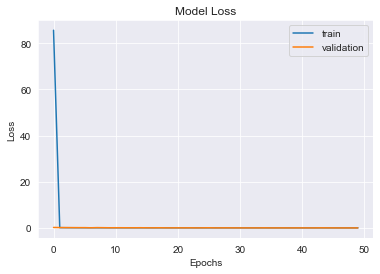

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

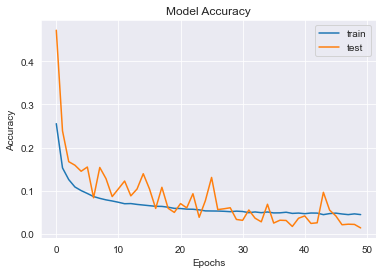

In [30]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [31]:
model.evaluate(X_test,y_test)

2409/2409 [==============================] - 5s 2ms/step - loss: 0.0231 - mean_absolute_error: 0.0091 - root_mean_squared_error: 0.0143


[0.023090243339538574, 0.009091479703783989, 0.014309687539935112]

In [28]:
y_train[0]

array([0.51647546])

In [29]:
y_train.shape

(308343, 1)

In [30]:
model(np.expand_dims(X_train[25],0))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.47986355]], dtype=float32)>